In [73]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from time import time

# Úkoly

1. Vygenerujte náhodná data a zobrazte je jako scatter plot pomocí. Nastavte barvu a velikost bodů.


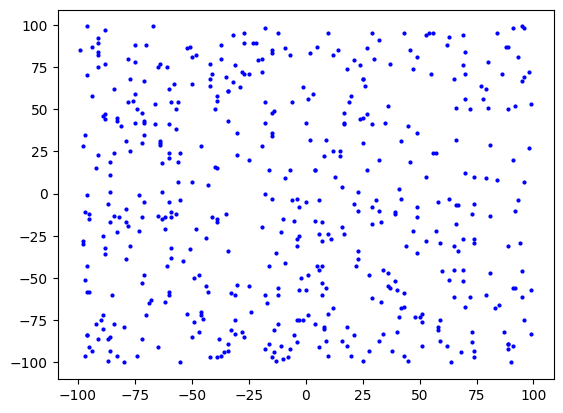

In [2]:
x = np.random.randint(size=500, low=-100, high=100)
y = np.random.randint(size=500, low=-100, high=100)
plt.scatter(x, y, color='blue', s=4)


2. Vykreslete 3D graf s funkcí $$z = \frac{\sin(\sqrt{x^2 + y^2})}{\sqrt{x^2 + y^2}}$$ Použijte `imshow` a `contour`.


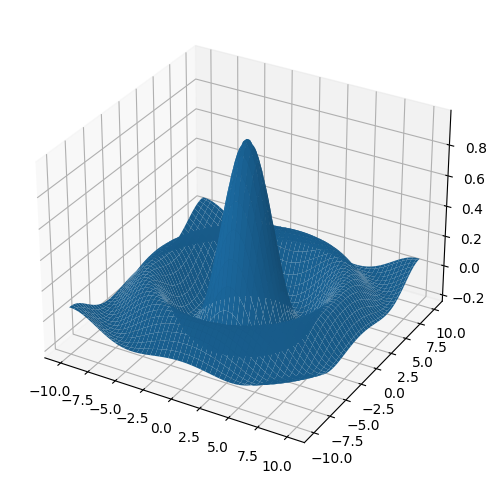

In [3]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2)) / np.sqrt(X**2 + Y**2)

fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

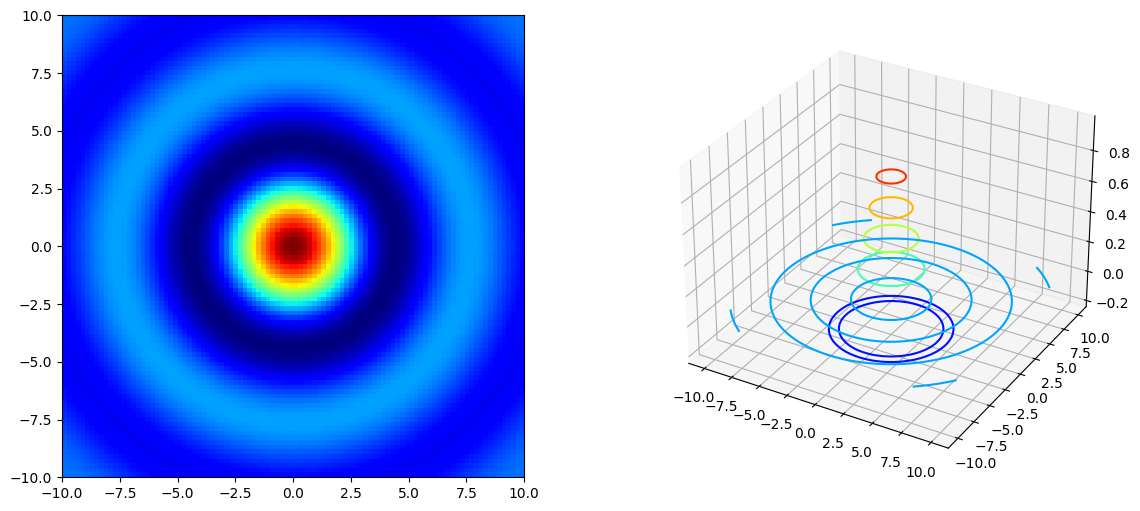

In [4]:
fig = plt.figure(figsize=(14, 6))

ax_imshow = fig.add_subplot(1, 2, 1)
ax_imshow.imshow(Z, cmap='jet', origin='lower', extent=[-10, 10, -10, 10])

ax_contour = fig.add_subplot(1, 2, 2, projection='3d')
ax_contour.contour(X, Y, Z, cmap='jet')

plt.show()


3. Vykreslete polar graf s funkcí $r = 2\sin(3θ)$. Použijte funkci plot a nastavte barvu, osy a titulek.


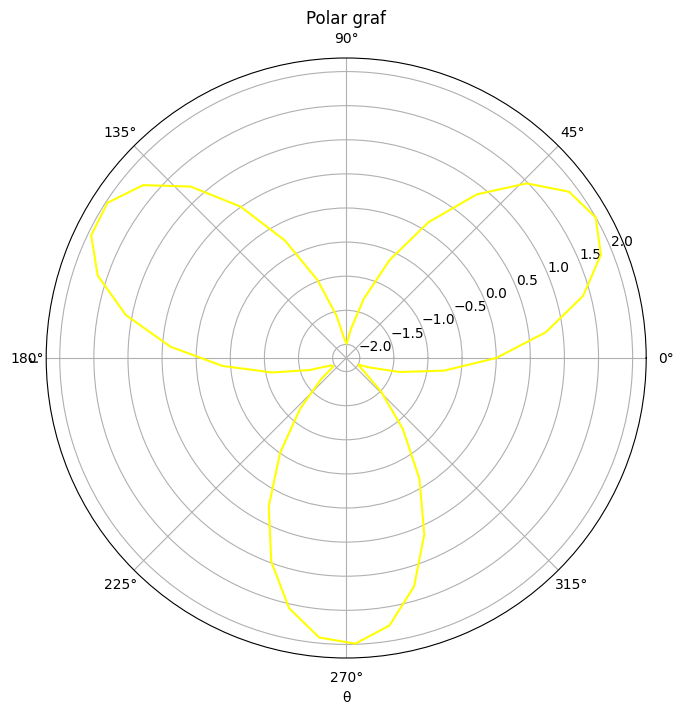

In [25]:
t = np.linspace(0, 2 * np.pi)
r = 2 * np.sin(3 * t)
fig = plt.figure(figsize=(14, 6))
ax = fig.add_axes([0., 0., 1., 1.], polar=True)
ax.set_title('Polar graf')
ax.set_xlabel('θ')
ax.set_ylabel('r')
ax.plot(t, r, color='yellow')
plt.show()


4. Vygenerujte náhodná data a zobrazte je jako histogram. Nastavte počet binů, barvu a popisky os.


(array([1.000e+00, 6.000e+00, 6.000e+00, 2.400e+01, 5.900e+01, 1.110e+02,
        1.950e+02, 3.360e+02, 5.130e+02, 7.590e+02, 9.970e+02, 1.216e+03,
        1.306e+03, 1.243e+03, 1.039e+03, 8.530e+02, 5.840e+02, 3.690e+02,
        2.000e+02, 1.100e+02, 4.000e+01, 2.200e+01, 7.000e+00, 3.000e+00,
        1.000e+00]),
 array([-4.06873487, -3.74643964, -3.42414441, -3.10184918, -2.77955395,
        -2.45725871, -2.13496348, -1.81266825, -1.49037302, -1.16807779,
        -0.84578256, -0.52348733, -0.2011921 ,  0.12110313,  0.44339836,
         0.76569359,  1.08798882,  1.41028406,  1.73257929,  2.05487452,
         2.37716975,  2.69946498,  3.02176021,  3.34405544,  3.66635067,
         3.9886459 ]),
 <BarContainer object of 25 artists>)

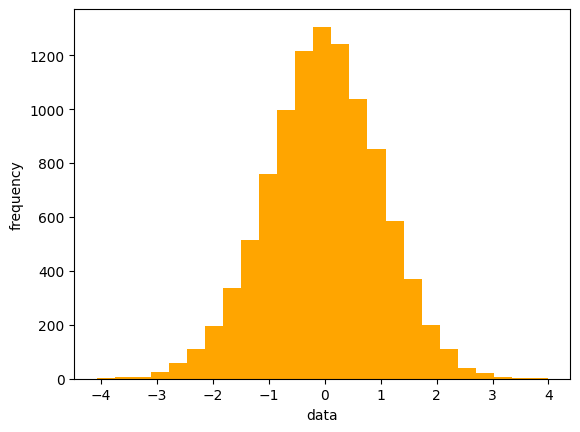

In [35]:
n = np.random.randn(10000)
plt.xlabel('data')
plt.ylabel('frequency')
plt.hist(n, bins=25, color='orange')


5. Vytvořte 3D surf graf s funkcí $$z = \cos(\sqrt{x^2 + y^2})$$


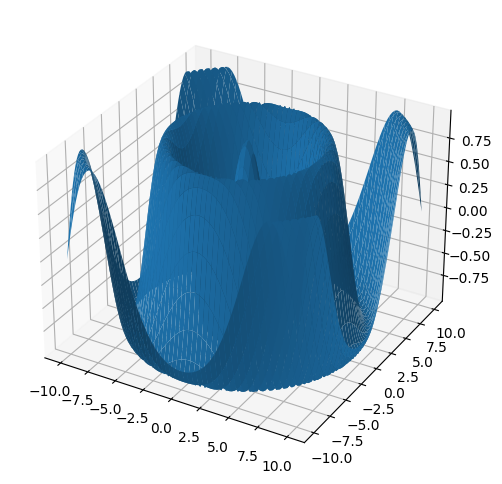

In [34]:
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = np.cos(np.sqrt(X**2 + Y**2))

fig = plt.figure(figsize=(14, 6))

ax = fig.add_subplot(1, 2, 1, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

# Domácí úkol
Použijte funkce z minulého úkolu `integer_spiral_numpy` a `integer_spiral`. 
1. Vykreslete spirálu (např pro n=101) a sinus hodnot ve spirále pomocí `imshow` a `contour`.
2. Měřte časy výpočtu pro `integer_spiral_numpy` a `integer_spiral` pro různé hodnoty mezi 11 a 1001 a porovnejte je.
3. Vykreslete log-log (obě osy v logaritmickém měřítku) graf obou časů výpočtů do jednoho grafu, nastavte popisky, legendu a osy.
4. Co vypovídají tyto grafy o výpočetních náročnostech obou funkcí? co reprezentuje sklon lineárního grafu v log-log grafu? 
    - hint $g(x) = ax$ v log-log grafu ve skutečnosti znamená, že původní funkce vypadá: $\log (f(x)) = a \log(x)$, jaká je tedy $f(x)$?

In [36]:
# naplnění matice spirálou čísel
def integer_spiral(n):
    # abychom nemuseli řešit okraj = kontrolovat jestli jsme mimo matici
    # vytvoříme matici o velikosti n+2 x n+2
    # a vyplníme pouze středovou část
    A = np.zeros((n + 2, n + 2))

    pos_row = n//2 + 1  # počáteční pozice: střed matice
    pos_col = n//2 + 1

    i = 1  # číslo, které se bude vkládat do matice

    A[pos_row, pos_col] = i  # vložíme číslo do středu matice
    i += 1
    pos_row -= 1  # posuneme se na první volné místo

    while i <= n**2:  # dokud nejsme na konci matice
        A[pos_row, pos_col] = i  # vložíme číslo na aktuální pozici
        i += 1  # zvýšíme číslo, které se má vložit
        if A[pos_row - 1, pos_col] != 0 and A[pos_row, pos_col + 1] == 0:
            pos_col += 1  # posuneme se doprava
        elif A[pos_row, pos_col - 1] != 0:
            pos_row -= 1  # posuneme se nahoru
        elif A[pos_row + 1, pos_col] != 0:
            pos_col -= 1  # posuneme se doleva
        else:
            pos_row += 1  # posuneme se dolů

    return A[1:-1, 1:-1]  # ořízneme nulový okraj

In [37]:
def integer_spiral_numpy(n):
    spiral = np.zeros([n + 2, n + 2])
    mid = n // 2 + 1
    spiral[mid, mid] = 1
    for i in range(mid + 1):
        arr = np.arange(i * 2) + (i**2 - (i - 1)**2)**2 + 1
        spiral[mid - i, mid - i:mid + i] = arr[::-1]
        arr += i * 2
        spiral[mid - i + 1:mid + i + 1, mid - i] = arr
        arr += i * 2
        spiral[mid + i, mid - i + 1:mid + i + 1] = arr
        arr += i * 2
        spiral[mid - i:mid + i, mid + i] = arr[::-1] 
    return(spiral[1:-1, 1:-1])

In [69]:
n = 101
spiral = integer_spiral(n)
sin_spiral = np.sin(integer_spiral(n))

x = np.linspace(0, 1, n)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)

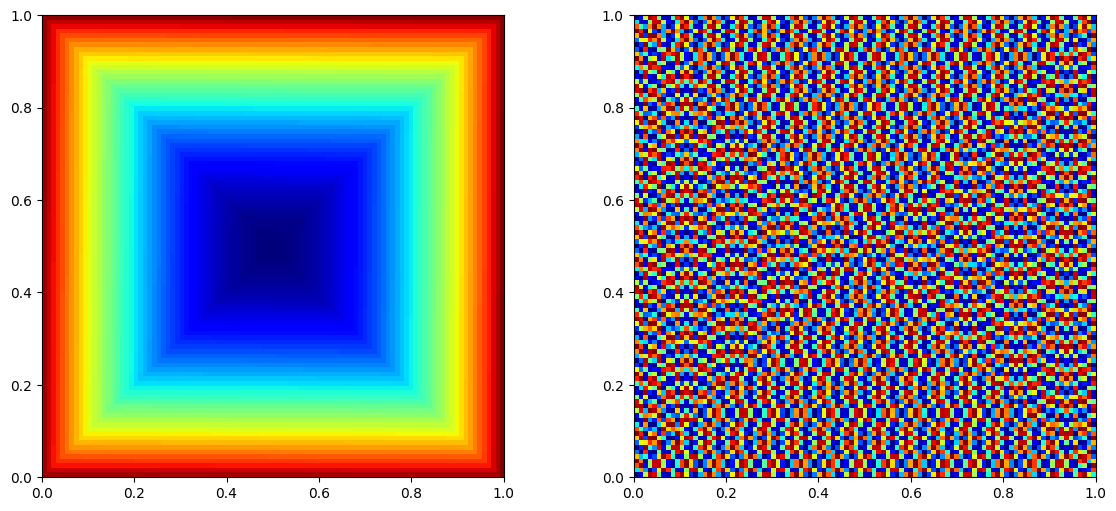

In [70]:
fig = plt.figure(figsize=(14, 6))

ax_imshow_spiral = fig.add_subplot(1, 2, 1)
ax_imshow_spiral.imshow(spiral, cmap='jet', origin='lower', extent=[0, 1, 0, 1])

ax_imshow_sin_spiral = fig.add_subplot(1, 2, 2)
ax_imshow_sin_spiral.imshow(sin_spiral, cmap='jet', origin='lower', extent=[0, 1, 0, 1])

plt.show()

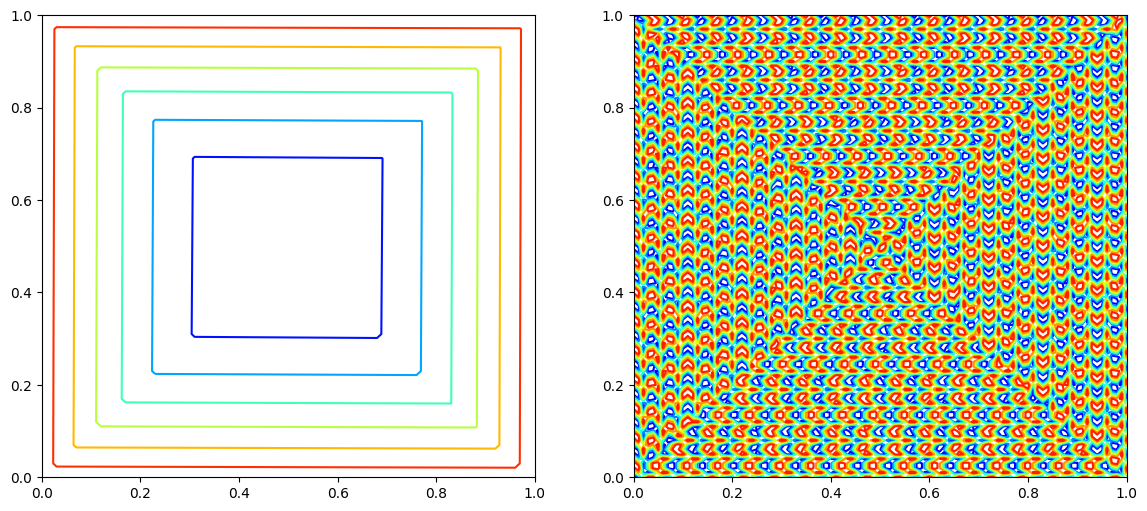

In [71]:
fig = plt.figure(figsize=(14, 6))

ax_contour_spiral = fig.add_subplot(1, 2, 1)
ax_contour_spiral.contour(X, Y, spiral, cmap='jet')

ax_contour_sin_spiral = fig.add_subplot(1, 2, 2)
ax_contour_sin_spiral.contour(X, Y, sin_spiral, cmap='jet')

plt.show()

In [74]:
t_default = []
t_numpy = []

for i in range(11, 1002, 2):
    t = time()
    integer_spiral(i)
    t_default.append(time() - t)
    
    t = time()
    integer_spiral_numpy(i)
    t_numpy.append(time() - t)


[]

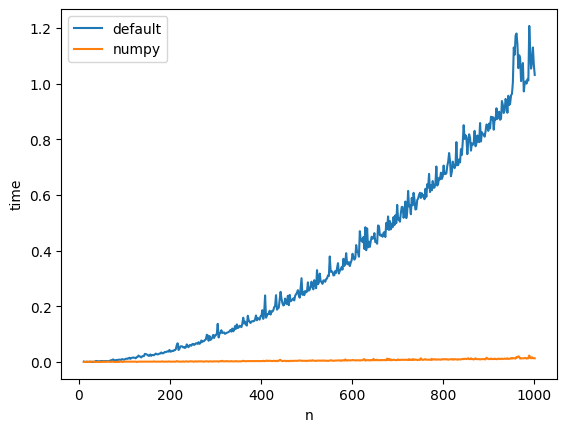

In [90]:
s = [i for i in range(11, 1002, 2)]

fig, ax = plt.subplots(1, 1)

ax.plot(s, t_default, label='default')
ax.plot(s, t_numpy, label='numpy')
ax.set_xlabel('n')
ax.set_ylabel('time')
ax.legend()
plt.plot()

[]

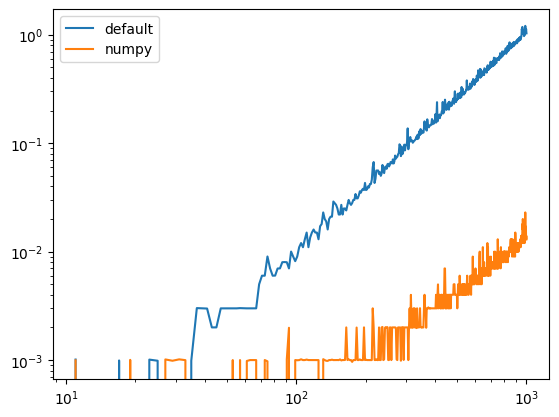

In [91]:
fig, ax = plt.subplots(1, 1)

ax.plot(s, t_default, label='default')
ax.plot(s, t_numpy, label='numpy')
ax.legend()
ax.set_xscale('log')
ax.set_yscale('log')
plt.plot()

# Bonusový úkol
Použijte funkci `polyfit` z knihovny `numpy` pro logaritmicky transponované časy a počty prvků a zjistěte koeficient u lineární funkce při aproximaci polynomem 1. stupně.

Vykreslete lineární aproximace získané funkci `polyfit` do log-log grafu společne s naměřenými daty.